In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#파일 경로를 입력하기
file_path = r"D:\프로그래밍\슈퍼코딩 DATA.AI\project1\IMDB top 1000.csv"

In [3]:
#csv 모듈 안 쓰고 행의 각 열 분리하고 다시 행으로 회집
def split_csv_line(line, delimiter=','):
    #큰따옴표 안의 구분자는 무시하고 분리
    row = [] #한 행에 들어갈 열들을 담을 리스트
    current = '' #지금 읽고 있는 한 열 문자열을 임시로 저장
    in_quotes = False #큰따옴표 안에 있는지 여부를 확인하는 버튼. default는 False
    # 한 글자씩 검사
    for c in line:
        if c == '"':  #큰따옴표일 시 True/Fase 상태를 변환
            in_quotes = not in_quotes 
        elif c == delimiter and not in_quotes: #쉼표 + 큰타옴표 밖이면 지금까지 모은 문자열을 한 컬럼으로 추가
            row.append(current)
            current = '' #다음 열을 위해 current 초기화
        else:
            current += c #그냥 글자는 현재 current 문자열에 추가
    row.append(current) #current 리스트에 추가
    return row

In [4]:
#파일을 읽고 ndarray로 변환하는 함수 작성하기
def csv_to_ndarray(file_path, delimiter=',', header=0):
    data = []
    with open(file_path, 'r') as f:
        #헤더 건너뛰기
        for _ in range(header):
            next(f)
            
        #실제 데이터 읽기
        for line in f:
            #줄바꿈 제거 및 구분자를 통한 분리
            line = line.strip()
            row = split_csv_line(line, delimiter)
            #숫자 변환 시도
            numeric_value = []
            for item in row:
                try:
                    numeric_value.append(float(item))
                except ValueError:
                    numeric_value.append(item)
            data.append(numeric_value)

        #ndarray로 변환
        return np.array(data, dtype=object)

In [5]:
movie_data = csv_to_ndarray(file_path, header=1)

In [6]:
print(movie_data)
print(movie_data.shape)

[[0.0 '1. The Shawshank Redemption (1994)' 'R' ...
  'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'
  'Director: Frank Darabont | Stars: Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler'
  'Votes: 2,295,987 | Gross: $28.34M']
 [1.0 '2. The Godfather (1972)' 'R' ...
  'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.'
  'Director: Francis Ford Coppola | Stars: Marlon Brando, Al Pacino, James Caan, Diane Keaton'
  'Votes: 1,584,782 | Gross: $134.97M']
 [2.0 '3. The Dark Knight (2008)' 'PG-13' ...
  'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.'
  'Director: Christopher Nolan | Stars: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine'
  'Votes: 2,260,649 | Gross: $534.86M']
 ...
 [997.0 '400.

In [7]:
#전체 영화 개수 구하기
num_movies = movie_data.shape[0]
print("전체 영화 개수:", num_movies)

#평점 열 추출하기
rate_column = movie_data[:, 5]

#object dtype을 float으로 변환하기
rate_column = np.array([float(x) for x in rate_column])

#평균, 최고, 최저 평점 계산
average_rate = np.mean(rate_column)
max_rate = np.max(rate_column)
min_rate = np.min(rate_column)

print("평균 평점:", average_rate)
print("최고 평점:", max_rate)
print("최저 평점:", min_rate)

전체 영화 개수: 1000
평균 평점: 8.0975
최고 평점: 9.3
최저 평점: 8.0


In [8]:
#타이틀 열 추출하기
title_column = movie_data[:, 1]
title = [t.split(".")[1].strip() for t in title_column]

#최고 평점 구하기
max_rate = np.max(rate_column)
print(max_rate)

#최고 평점을 받은 영화 인덱스
indices = np.where(rate_column == max_rate)[0]
print(indices)

#출력
for i in indices:
    print(f"""
⭐ 최고 평점 영화 목록:
{title[i]} - 평점: {rate_column[i]}
    """)

9.3
[0]

⭐ 최고 평점 영화 목록:
The Shawshank Redemption (1994) - 평점: 9.3
    


In [9]:
#장르 열 처리하기: 큰따옴표 제거, 쉼표 기준 분리, 공백 제거 후 리스트에 담기
genres_column = []  # 모든 장르를 담을 리스트
movie_genres = []   # 영화별 장르 리스트

for g in movie_data[:, 4]:
    g_list = g.replace('"', '').split(',')
    clean_list = [genre.strip() for genre in g_list]
    movie_genres.append(clean_list)      #영화별 장르 저장
    genres_column.extend(clean_list)      #전체 장르 누적

print(movie_genres)
print("-" * 100)
print(genres_column)

[['Drama'], ['Crime', 'Drama'], ['Action', 'Crime', 'Drama'], ['Crime', 'Drama'], ['Action', 'Adventure', 'Drama'], ['Crime', 'Drama'], ['Biography', 'Drama', 'History'], ['Crime', 'Drama'], ['Action', 'Adventure', 'Sci-Fi'], ['Drama'], ['Action', 'Adventure', 'Drama'], ['Drama', 'Romance'], ['Western'], ['Biography', 'Drama', 'History'], ['Action', 'Adventure', 'Drama'], ['Action', 'Sci-Fi'], ['Biography', 'Crime', 'Drama'], ['Action', 'Adventure', 'Fantasy'], ['Drama'], ['Comedy', 'Drama', 'Thriller'], ['Adventure', 'Drama', 'Sci-Fi'], ['Crime', 'Drama'], ['Animation', 'Adventure', 'Family'], ['Drama', 'War'], ['Crime', 'Drama', 'Fantasy'], ['Comedy', 'Drama', 'Romance'], ['Crime', 'Drama', 'Mystery'], ['Crime', 'Drama', 'Thriller'], ['Action', 'Adventure', 'Fantasy'], ['Action', 'Drama', 'Mystery'], ['Action', 'Adventure', 'Drama'], ['Drama', 'Family', 'Fantasy'], ['Crime', 'Drama', 'Thriller'], ['Drama', 'Music'], ['Biography', 'Comedy', 'Drama'], ['Drama', 'Mystery', 'Sci-Fi'], ['

In [10]:
#중복을 제거하는 집합 데이터 타입으로 모든 장르 추출하기
all_genres = set(genres_column)

#장르별 평균 평점 계산하기: 사전형 사용
genre_avg = {}
for genre in all_genres:
    # 해당 장르를 포함한 영화별 장르 리스트와 인덱스를 동시에 가져와서 movie_data의 인덱스와 대응시키고 해당하는 리스트들을 리스트로 취합하기
    indices = [i for i, g_list in enumerate(movie_genres) if genre in g_list]
    avg_rate = np.mean(rate_column[indices])
    genre_avg[genre] = avg_rate

print(genre_avg)


{'Adventure': np.float64(8.093364928909953), 'Biography': np.float64(8.066666666666666), 'Sport': np.float64(8.175), 'Comedy': np.float64(8.075), 'Musical': np.float64(8.091666666666667), 'War': np.float64(8.20540540540541), 'Mystery': np.float64(8.109708737864077), 'Crime': np.float64(8.119318181818182), 'Action': np.float64(8.08937198067633), 'Family': np.float64(8.16), 'Music': np.float64(8.082142857142857), 'Drama': np.float64(8.101373626373626), 'Romance': np.float64(8.077551020408162), 'Thriller': np.float64(8.072727272727272), 'Fantasy': np.float64(8.11320754716981), 'Film-Noir': np.float64(8.129411764705882), 'Animation': np.float64(8.059), 'Sci-Fi': np.float64(8.10952380952381), 'Western': np.float64(8.357142857142858), 'Horror': np.float64(8.19230769230769), 'History': np.float64(8.093939393939394)}


In [11]:
def get_rate(item):
    # item = ('장르', 평균평점) 튜플
    return item[1]  # 두 번째 요소(평점)를 반환

#평균 평점 기준 내림차순 정렬
sorted_genres = sorted(genre_avg.items(), key=get_rate, reverse=True) #sorted() 함수의 매개변수 key(정렬 기준)을 사용

#출력하기
print("🎭 장르별 평균 평점:")
for genre, avg in sorted_genres:
    print(f"{genre}: {avg:.1f}")

🎭 장르별 평균 평점:
Western: 8.4
War: 8.2
Horror: 8.2
Sport: 8.2
Family: 8.2
Film-Noir: 8.1
Crime: 8.1
Fantasy: 8.1
Mystery: 8.1
Sci-Fi: 8.1
Drama: 8.1
History: 8.1
Adventure: 8.1
Musical: 8.1
Action: 8.1
Music: 8.1
Romance: 8.1
Comedy: 8.1
Thriller: 8.1
Biography: 8.1
Animation: 8.1


In [ ]:
#연도 추출 시험 코드
"""
years = []
for title in movie_data[:, 1]:
    if "(" in title and ")" in title:
        _ = title.split("(")[-1].replace(")", "").strip()
        if _.isdigit() and len(_) == 4:  # 숫자 4자리만 연도로 인정
            years.append(_)
        else:
            years.append(None)  # 잘못된 값은 None 처리
    else:
        years.append(None)
"""

In [39]:
#연도(key)와 평균 평점(value) 사전 만들기
#연도 추출을 위해 year = [y.split("(")[1].strip().replace(")", "") for y in movie_data[:, 1]]를 시도했으나 'I'도 출력되어 버린다.
#앞의 rate_column(평점 열)과 title_column(타이틀 열) 재사용
Released_Year = {}

#연도 추출 함수
def extract_year(title: str): #인자 옆 :는 인자의 데이터 유형에 대한 힌트 
    if "(" in title and ")" in title:
        return title.split("(")[-1].replace(")", "").strip()
    return None

#영화 제목과 평점을 순회하는 함수
#zip() 함수는 여러 시퀀스(리스트, 튜플 등)의 같은 인덱스 요소들을 하나로 묶어 튜플로 반환한다.
for title, rate in zip(title_column, rate_column):
    year = extract_year(title)
    if year:  # 연도가 추출된 것이 맞는 경우(extract_year() 함수는 None, 즉 False를 반환할 수도 있다)
        if year not in Released_Year:
            Released_Year[year] = []   # 새 연도는 리스트 초기화로 초기화한다. 즉 사전의 value 자리 데이터 유형은 리스트.
        
        Released_Year[year].append(float(rate))  # 평점 추가(조건과 상관 없이 실행되는 부분이므로 else가 안 들어간다)

# 연도별 평균 평점 계산
year_avg = {}
for y, r in Released_Year.items():
    year_avg[y] = np.mean(r)

# 출력 (연도순 정렬)
for y in sorted(year_avg.keys()):
    print(f"{y}: {year_avg[y]:.1f}")


1920: 8.1
1921: 8.3
1924: 8.2
1925: 8.2
1926: 8.1
1927: 8.1
1928: 8.1
1931: 8.4
1934: 8.1
1936: 8.5
1937: 8.1
1939: 8.1
1940: 8.1
1941: 8.3
1942: 8.3
1944: 8.3
1946: 8.6
1948: 8.1
1949: 8.1
1950: 8.3
1951: 8.1
1952: 8.3
1953: 8.1
1954: 8.2
1955: 8.2
1957: 8.2
1958: 8.2
1959: 8.2
1960: 8.2
1961: 8.2
1962: 8.2
1963: 8.3
1964: 8.4
1965: 8.3
1966: 8.3
1967: 8.1
1968: 8.4
1971: 8.4
1972: 8.5
1973: 8.2
1974: 8.6
1975: 8.3
1976: 8.2
1977: 8.6
1978: 8.1
1979: 8.3
1980: 8.3
1981: 8.4
1982: 8.1
1983: 8.3
1984: 8.2
1985: 8.3
1986: 8.2
1987: 8.2
1988: 8.3
1989: 8.1
1990: 8.7
1991: 8.1
1992: 8.0
1993: 8.0
1994: 8.6
1995: 8.1
1996: 8.0
1997: 8.1
1998: 8.1
1999: 8.1
2000: 8.1
2001: 8.1
2002: 8.2
2003: 8.0
2004: 8.0
2005: 8.1
2006: 8.1
2007: 8.0
2008: 8.1
2009: 8.0
2010: 8.1
2011: 8.1
2012: 8.1
2013: 8.0
2014: 8.1
2015: 8.0
2016: 8.0
2017: 8.1
2018: 8.1
2019: 8.1
2020: 8.7


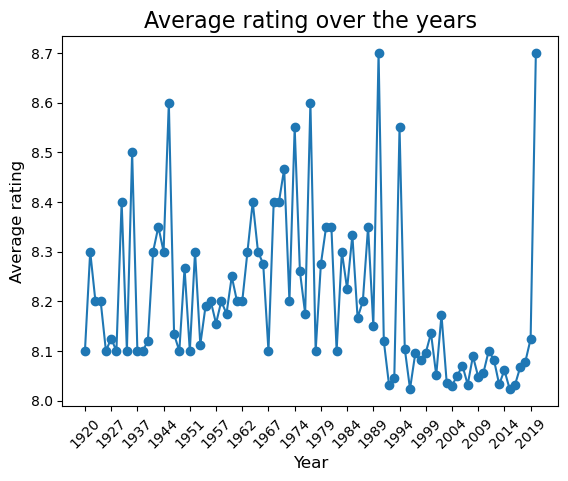

In [45]:
#Matplotlib을 사용하여 연도별 평균 평점 변화를 그래프로 표현하기
#연도와 평균 평점 분리 (정렬 필요 → 연도가 문자열이라 int로 변환 후 정렬)
years = sorted(year_avg.keys(), key=lambda x: int(x)) #sorted() 함수에서 key 매개변수는 정렬 기준을 지정하고, lambda는 매개변수: 표현식 문법을 지닌 임시 함수다.
avg_rates = [year_avg[y] for y in years]

# 그래프 그리기(o로 좌표 표시)
plt.plot(years, avg_rates, marker='o')

# 그래프 꾸미기
plt.title("Average rating over the years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average rating", fontsize=12)
plt.xticks(years[::5], rotation=45) #5년 단위로 눈금을 표시하고 기울이기

plt.show()